In [1]:
from datetime import datetime
from datetime import timezone

In [3]:
import pytz

In [8]:
KST = pytz.timezone('Asia/Seoul')

In [9]:
datetime(2019,1,1,tzinfo=timezone.utc) == \
KST.localize(datetime(2019,1,1))

False

In [10]:
mydate = datetime(2019,1,1)

In [11]:
mydate.replace(tzinfo=KST)

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

In [14]:
mydate_kst = KST.localize(mydate)

mydate_kst

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [16]:
mydate_kst.astimezone(pytz.utc) == mydate_kst

True

In [18]:
mydate_kst.strftime("%Y-%m-%d %H:%M:%S %Z")

'2019-01-01 00:00:00 KST'

In [19]:
mydate_kst.astimezone(pytz.utc).strftime("%Y-%m-%d %H:%M:%S %Z")

'2018-12-31 15:00:00 UTC'

In [20]:
# strftime.org

In [23]:
datetime.utcnow().astimezone(KST)

datetime.datetime(2020, 9, 7, 11, 54, 9, 407242, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [24]:
today = datetime.today()

In [25]:
today.weekday()

0

In [35]:
def last_friday():
    today = KST.localize(datetime.today())
    offset = 4 - today.weekday() % 4
    # aweekago = today.replace(day = today.day - 7)
    aweekago = today - timedelta(weeks=1)
    # last_friday = aweekago.replace(day = aweekago.day + offset)
    last_friday = aweekago + timedelta(days=offset)
    return last_friday

In [36]:
last_friday() # 월초에 실행하면 오류 발생

datetime.datetime(2020, 9, 4, 21, 5, 59, 170744, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [28]:
from datetime import timedelta

In [29]:
pytz.utc.localize(mydate) - KST.localize(mydate)

datetime.timedelta(seconds=32400)

In [31]:
pytz.utc.localize(mydate) + timedelta(seconds=32400)

datetime.datetime(2019, 1, 1, 9, 0, tzinfo=<UTC>)

In [38]:
KST.localize(mydate)

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df_apple = \
pd.read_csv('./data/apple_stock.csv', index_col='Date', parse_dates=True)

<AxesSubplot:xlabel='Date'>

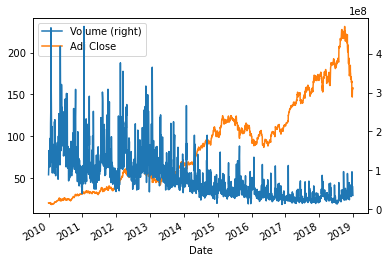

In [46]:
df_apple[['Volume', 'Adj Close']].plot(secondary_y=['Volume'])

Text(0, 0.5, 'Close Price')

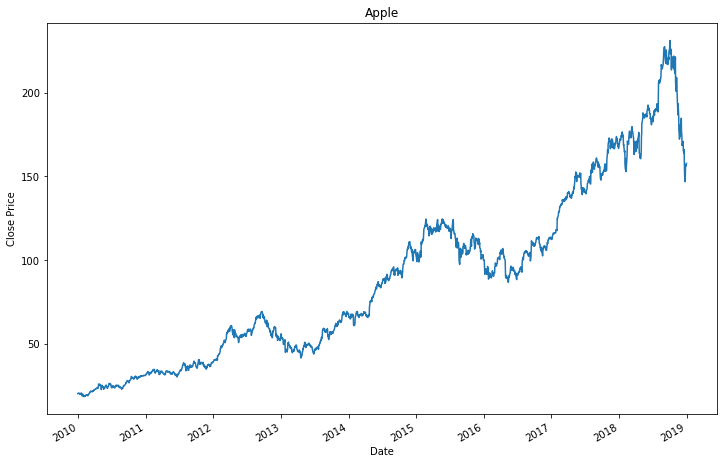

In [51]:
df_apple['Adj Close'].plot(figsize=(12,8))
plt.title('Apple')
plt.ylabel('Close Price')

<AxesSubplot:xlabel='Date'>

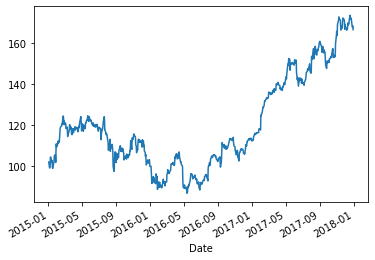

In [57]:
df_apple['Adj Close']['2015-01-01' : '2018-01-01'].plot()

<AxesSubplot:xlabel='Date'>

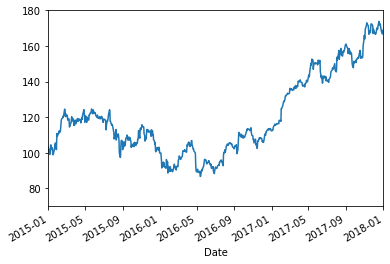

In [59]:
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'],
                          ylim=[70, 180])

In [66]:
index = df_apple['2015-01-01':'2018-01-01'].index
stock = df_apple['2015-01-01':'2018-01-01']['Adj Close']

In [67]:
import matplotlib.dates as dates

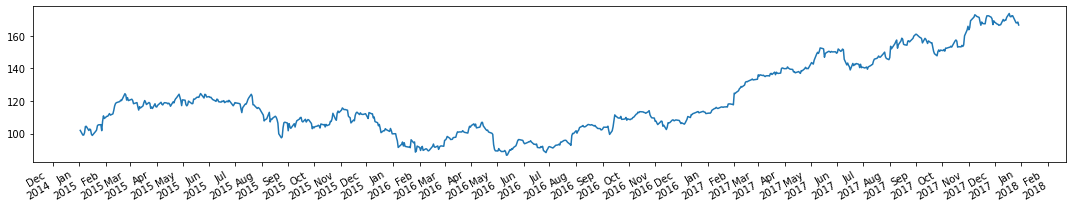

In [68]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot_date(index, stock, '-')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
fig.autofmt_xdate()
plt.tight_layout()